### PSIAPI TUTORIAL: USING PSI4 AS A PYTHON MODULE
https://psicode.org/psi4manual/master/psiapi.html#I.-Basic-Input-Structure

## Part 1
### I. Basic Input Structure

In [1]:
import psi4

In [2]:
%%time
psi4.core.set_output_file('output.dat', False)

CPU times: user 200 µs, sys: 166 µs, total: 366 µs
Wall time: 429 µs


### II. Running a Basic Hartree-Fock Calculation

In [4]:
%%time

#! Sample HF/cc-pVDZ H2O Computation
psi4.core.set_output_file('H2O_output.dat', False)

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 377 ms, sys: 147 ms, total: 524 ms
Wall time: 602 ms


-76.0266327350902

In [5]:
%%time
# performs a calculation for the CH2 molecule using the UHF method with a 6-31G** basis set
#! Sample UHF/6-31G** CH2 Computation
psi4.core.set_output_file('CH2_output.dat', False)

R = 1.075   # bond length in angstroms (Å)
A = 133.93  # bond angle in degrees

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)  #The .format(R, A) replaces {0} with R and {1} with A.
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 325 ms, sys: 17 ms, total: 342 ms
Wall time: 348 ms


-38.92533462893707

### III. Geometry Optimization and Vibrational Frequency Analysis

In [6]:
%%time
psi4.core.set_output_file('H2O_optimized_output.dat', False)
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 830 ms, sys: 46.6 ms, total: 877 ms
Wall time: 895 ms


-76.02703272937481

In [7]:
%%time
psi4.core.set_output_file('H2O_optimized_frequency_output.dat', False)
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

CPU times: user 1.11 s, sys: 68.9 ms, total: 1.18 s
Wall time: 1.2 s


### IV. Analysis of Intermolecular Interactions

In [8]:
%%time
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database
psi4.core.set_output_file('ethene_ethyne_output1.dat', False)

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 1.55 ms, sys: 0 ns, total: 1.55 ms
Wall time: 1.87 ms


In [9]:
%%time
psi4.core.set_output_file('ethene_ethyne_output.dat', False)
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.77 s, sys: 387 ms, total: 4.15 s
Wall time: 4.4 s


-0.0022355823909805178

### V. Potential Surface Scans and Counterpoise Correction Made Easy

In [10]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2
psi4.core.set_output_file('Ne2_output.dat', False)

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.73 s, sys: 1.68 s, total: 7.41 s
Wall time: 10.7 s


## Part 2

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies

           R [Ang]                 E_int [kcal/mol]
 ---------------------------------------------------------

            3.5                        0.168852

            3.8                        -0.069952

            4.0                        -0.123122

            4.2                        -0.116537

            4.5                        -0.095162

            4.8                        -0.073663

            5.0                        -0.055927

            5.2                        -0.042277

            5.5                        -0.032054

            5.8                        -0.024469

            6.0                        -0.018843



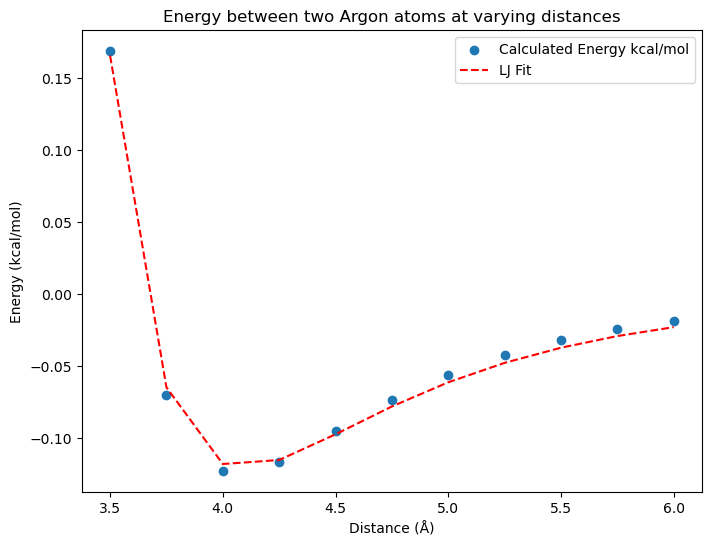

In [8]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function for Lennard-Jones potential
def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r)**12 - (sigma / r)**6)

# Set output file for Psi4
psi4.set_output_file('Argon_output.dat', False)

# Define Argon dimer geometry template
ar_geometry_template = """
Ar
--
Ar 1 {}
"""

# Range of interatomic distances to scan
Rvals = np.arange(3.5, 6.25, 0.25)

# Set Psi4 options
psi4.set_options({'freeze_core': True})

# Calculate energies at different distances
ecp = {}
for R in Rvals:
    ar2 = psi4.geometry(ar_geometry_template.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Convert energies to kcal/mol and store in a list
energy_list = [ecp[R] * psi4.constants.hartree2kcalmol for R in Rvals]

# Fit the energies to Lennard-Jones potential
popt, pcov = curve_fit(lj, Rvals, energy_list, p0=[3.5, 1.0])

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(Rvals, energy_list, label="Calculated Energy kcal/mol")
plt.plot(Rvals, lj(Rvals, *popt), 'r--', label='LJ Fit')
plt.legend()
plt.xlabel('Distance (Å)')
plt.ylabel('Energy (kcal/mol)')
plt.title('Energy between two Argon atoms at varying distances')
plt.savefig("argon_energy_curve.png")

# Print energies to console and output file
header = "CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n"
format_line = "          R [Ang]                 E_int [kcal/mol]\n"
separator = "---------------------------------------------------------\n"

print(header, format_line, separator)
psi4.core.print_out(header)
psi4.core.print_out(format_line)
psi4.core.print_out(separator)

for R, E in zip(Rvals, energy_list):
    line = f"            {R:3.1f}                        {E:1.6f}\n"
    print(line)
    psi4.core.print_out(line)
